In [1]:
#import all libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#load data
data = pd.read_csv('C:/Users/LENOVO/Logistic-Regression-Manual/data.csv')

In [7]:
#checking the data
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [9]:
#checking if data is heavily skewed
data['diagnosis'].value_counts(normalize=True)

diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [13]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [15]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [17]:
#from above we can see Unnamed: 32 is totally null so useless and we can see id play no roll in prediction so drop it as well
data = data.drop('id' , axis = 1)
data = data.drop('Unnamed: 32' , axis = 1)

In [19]:
#converting M-1 and B-0
data['diagnosis'].replace({'M':1,'B':0},inplace = True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_39308\2498742137.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['diagnosis'].replace({'M':1,'B':0},inplace = True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_39308\2498742137.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['diagnosis'

In [21]:
#checking again
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [23]:
#splitting the data
X = data.drop('diagnosis' , axis = 1)
y = data['diagnosis']


In [25]:
#reshape yr
y = y.values.reshape((-1,))

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X ,y ,test_size=0.2 ,random_state=42)

In [29]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [31]:
#manual implementation of cost function
def compute_cost(X,y,W,b , lambda_):
    m , n = X.shape
    cost = 0
    for i in range(m):
        z_i = np.dot(X[i], W) + b                                      
        f_wb_i = sigmoid(z_i)
        f_wb_i = np.clip(f_wb_i, 1e-15, 1 - 1e-15)
        cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)
    cost /= m
    reg = 0
    for i in range(n):
        reg += W[i]**2
    reg *= lambda_
    reg *= (1/(2*m))
    return (cost + reg).item()

In [33]:
def compute_gradient(X,y,W,b,lambda_):
    m , n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0
    for i in range(m):
        z = np.dot(X[i],W).item()+b
        f_wbi = sigmoid(z)
        err = (f_wbi - y[i])
        for j in range(n):
            dj_dw[j] += err*X[i,j] 
        dj_db += err
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    for j in range(n):
        dj_dw_reg = (lambda_/m)*W[j]
        dj_dw[j] += dj_dw_reg
    return dj_dw,dj_db

In [35]:
def gradient_descent(X, y, w_in, b_in, compute_cost, compute_gradient,
                     num_iter, alpha, lambda_, X_test=None, y_test=None):
    import copy
    w = copy.deepcopy(w_in)
    b = b_in
    j_history_train = []
    j_history_test = []

    for i in range(num_iter):
        dj_dw, dj_db = compute_gradient(X, y, w, b, lambda_)
        
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        cost_train = compute_cost(X, y, w, b, lambda_)
        j_history_train.append(cost_train)
        
        if X_test is not None and y_test is not None:
            cost_test = compute_cost(X_test, y_test, w, b, lambda_)
            j_history_test.append(cost_test)

    return w, b, j_history_train, j_history_test

In [37]:
#now here a important note don't mess up shape of w
m , n =X_train.shape
w_in = np.zeros((n,))
b_in = 0.0
alpha = 0.01
iterations = 1000
lambda_ = 2

In [39]:
#normalize the data using standard scalar fron sklearn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
#train the model
w_final, b_final, train_costs, test_costs = gradient_descent(
    X_train_scaled, y_train, w_in, b_in,
    compute_cost, compute_gradient,
    iterations, alpha, lambda_,
    X_test_scaled,y_test
)

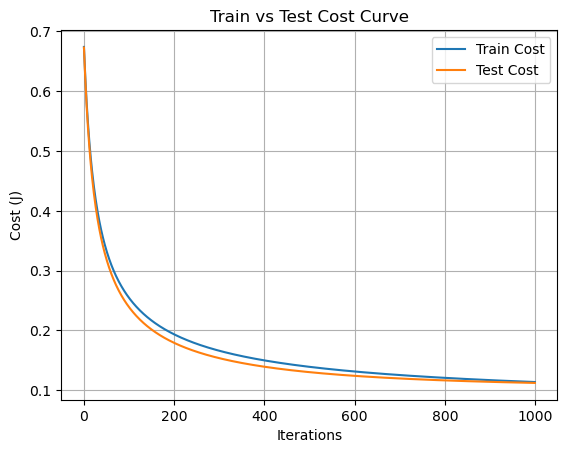

In [43]:
#plotting the results to check bias and variance
plt.plot(train_costs, label="Train Cost")
plt.plot(test_costs, label="Test Cost")
plt.xlabel("Iterations")
plt.ylabel("Cost (J)")
plt.title("Train vs Test Cost Curve")
plt.legend()
plt.grid(True)
plt.show()

In [45]:
#predict
def predict(X,w,b):
    z = np.dot(X, w)+b
    f_wbi = sigmoid(z)
    return np.where(f_wbi >= 0.5 , 1, 0)
y_test_preds = predict(X_test_scaled , w_final,b_final)

In [47]:
#evaluating
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_test_preds))
print(confusion_matrix(y_test, y_test_preds))
print(classification_report(y_test, y_test_preds))

Accuracy: 0.9824561403508771
[[70  1]
 [ 1 42]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



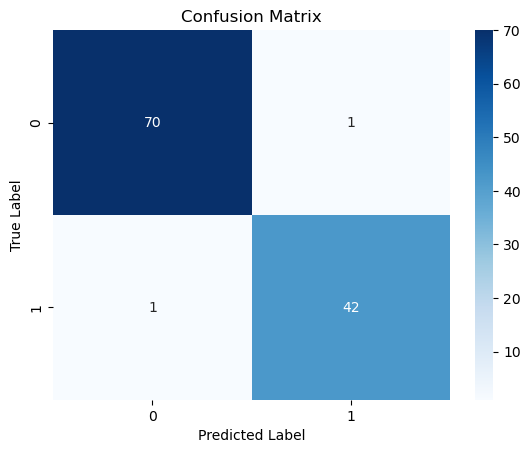

In [49]:
#plotting again to visually see confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_preds)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [51]:
#now lets try sklearn to compare

In [53]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_scaled,y_train)
y_pred = model.predict(X_test_scaled)

In [55]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9736842105263158
[[70  1]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [57]:
#here manual one slightly outperform sklearn and there is no sign of overfitting